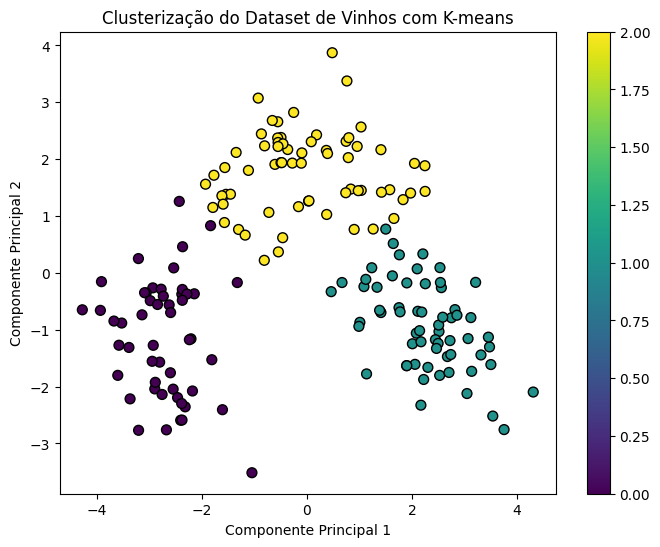

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Carregando o dataset
data = load_wine()
X = data.data
y = data.target

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando o K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Reduzindo a dimensionalidade para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotando os resultados
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Clusterização do Dataset de Vinhos com K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter)
plt.show()

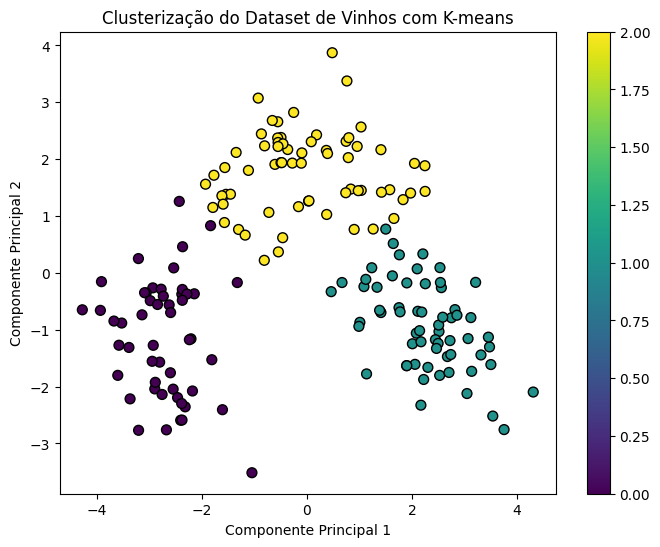

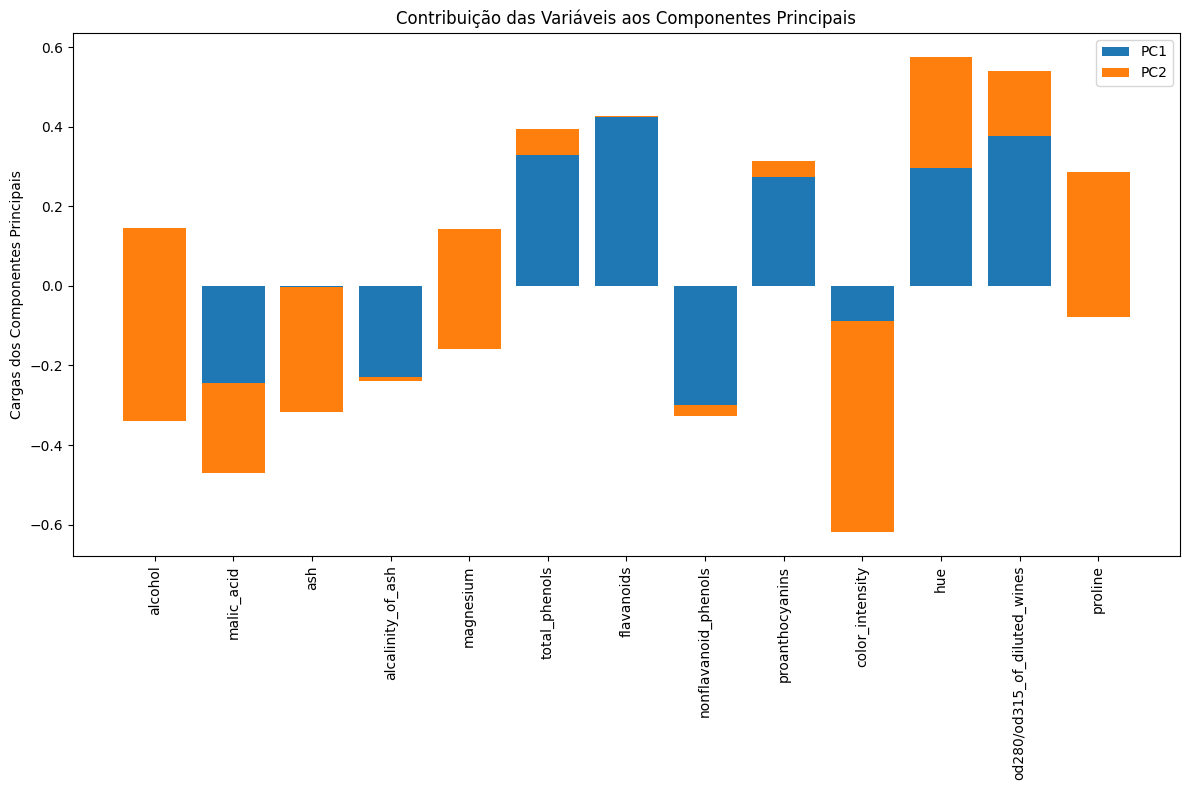

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Carregando o dataset
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando o K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Reduzindo a dimensionalidade para visualização com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotando os resultados do clustering
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('Clusterização do Dataset de Vinhos com K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter)
plt.show()

# Visualizando as cargas dos componentes principais
loadings = pca.components_.T
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(range(len(feature_names)), loadings[:, 0], label='PC1')
ax.bar(range(len(feature_names)), loadings[:, 1], bottom=loadings[:, 0], label='PC2')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.ylabel('Cargas dos Componentes Principais')
plt.title('Contribuição das Variáveis aos Componentes Principais')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Definindo o dataset
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

# Criando o codificador de transações e transformando o dataset
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Executando o algoritmo Apriori para encontrar conjuntos de itens frequentes
frequent_itemsets = apriori(df, min_support=0.7, use_colnames=True)

# Gerando as regras de associação a partir dos conjuntos de itens frequentes
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Imprimindo as regras de associação encontradas
print(rules)


              antecedents            consequents  antecedent support  \
0          (Kidney Beans)                 (Eggs)                 1.0   
1                  (Eggs)         (Kidney Beans)                 0.8   
2                 (Onion)                 (Eggs)                 0.6   
3                  (Eggs)                (Onion)                 0.8   
4                  (Milk)         (Kidney Beans)                 0.6   
5                 (Onion)         (Kidney Beans)                 0.6   
6                (Yogurt)         (Kidney Beans)                 0.6   
7           (Onion, Eggs)         (Kidney Beans)                 0.6   
8   (Onion, Kidney Beans)                 (Eggs)                 0.6   
9    (Kidney Beans, Eggs)                (Onion)                 0.8   
10                (Onion)   (Kidney Beans, Eggs)                 0.6   
11                 (Eggs)  (Onion, Kidney Beans)                 0.8   

    consequent support  support  confidence  lift  leverage  co

In [ ]:
#!pip install pyfpgrowth
import pyfpgrowth
transactions = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
                ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
                ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
                ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
                ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

patterns = pyfpgrowth.find_frequent_patterns(transactions, 2)
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)
print(rules)


{('Nutmeg',): (('Eggs', 'Kidney Beans', 'Onion', 'Yogurt'), 1.0), ('Eggs', 'Nutmeg'): (('Kidney Beans', 'Onion', 'Yogurt'), 1.0), ('Eggs', 'Yogurt'): (('Kidney Beans', 'Onion'), 1.0), ('Nutmeg', 'Yogurt'): (('Eggs', 'Kidney Beans', 'Onion'), 1.0), ('Nutmeg', 'Onion'): (('Eggs', 'Kidney Beans', 'Yogurt'), 1.0), ('Onion', 'Yogurt'): (('Eggs', 'Kidney Beans'), 1.0), ('Kidney Beans', 'Nutmeg'): (('Eggs', 'Onion', 'Yogurt'), 1.0), ('Eggs', 'Nutmeg', 'Onion'): (('Kidney Beans', 'Yogurt'), 1.0), ('Eggs', 'Nutmeg', 'Yogurt'): (('Kidney Beans', 'Onion'), 1.0), ('Eggs', 'Onion', 'Yogurt'): (('Kidney Beans',), 1.0), ('Nutmeg', 'Onion', 'Yogurt'): (('Eggs', 'Kidney Beans'), 1.0), ('Eggs', 'Kidney Beans', 'Nutmeg'): (('Onion', 'Yogurt'), 1.0), ('Eggs', 'Kidney Beans', 'Yogurt'): (('Onion',), 1.0), ('Kidney Beans', 'Nutmeg', 'Yogurt'): (('Eggs', 'Onion'), 1.0), ('Kidney Beans', 'Nutmeg', 'Onion'): (('Eggs', 'Yogurt'), 1.0), ('Kidney Beans', 'Onion', 'Yogurt'): (('Eggs',), 1.0), ('Eggs', 'Kidney Bean